In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Top

In [3]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip3 install pandas --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 68.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


In [5]:
!pip show pandas

Name: pandas
Version: 2.0.0
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: 
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distrib

In [6]:
#import packages
import os
 
 
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn  as sns
from sklearn.metrics import mean_squared_error
from scipy.stats.mstats import spearmanr
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

from tensorflow import keras

In [7]:
!cp -r /content/drive/MyDrive/Combdata/comcp.xlsx .

cp: cannot stat '/content/drive/MyDrive/Combdata/comcp.xlsx': No such file or directory


In [8]:
# !pip install pandas==0.23.4

In [9]:
print(pd.__version__)

2.0.0


In [10]:
df = pd.read_excel("/content/comcp.xlsx")
df = df.dropna(how='all')

FileNotFoundError: ignored

In [ ]:
df

In [ ]:
df.head()

In [ ]:
df = df.dropna(how='any',axis=0) 

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [ ]:

df.isnull().sum().sum()

In [ ]:
 #setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']



In [ ]:
df = df.drop(df.columns[[0]], axis=1)

In [ ]:
df

In [ ]:
cols = list(df.columns.values)

In [ ]:
cols

In [ ]:
df = df[[' Close ' , ' High ', ' Low ',  ' Open ', ' Trades ', ' Volume ', ' Trunover ']]

In [ ]:
df

In [ ]:
print(df.dtypes)

In [ ]:
corr_df = pd.DataFrame(columns =['Close_r' ,'Close_p','High_r','High_p'])
 
for col in df:
    r1,p1 = stats.spearmanr(df[' Close '],df[col])
    r2,p2 = stats.spearmanr(df[' High '],df[col])
    corr_df.loc[col] =[round(r1,3),round(p1,3),round(r2,3),round(p2,3)]
    

      
corr_df

In [ ]:
no_col = len(df.columns)
no_col
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'violet', 'grey', 'indigo']
index = 1
plt.figure(figsize=(30,45))
for column in df.columns:
    plt.subplot(no_col,1,index)
    plt.plot(df[column], color = colors[index])
    plt.title(column,loc='right', y = 0.5)
    index+=1
plt.show()

In [ ]:
 #plotting the graph  
sns.countplot(data=df)  
plt.show()

In [ ]:
#plot
plt.figure(figsize=(20,10))
plt.plot(df.index.values,df[' Close '])
plt.title('Commercial bank share prices')
plt.xlabel('Year')
plt.ylabel('Closing price')
plt.show()

In [ ]:
df = pd.read_excel("/content/comcp.xlsx")
df = df.dropna(how='all')

In [ ]:
df.isnull().sum().sum()

In [ ]:
df = df.dropna(how='any',axis=0) 

In [ ]:
df.isnull().sum().sum()


In [ ]:
df.shape

In [ ]:
cols = list(df.columns.values)

In [ ]:
cols

In [ ]:
df = df[['Date',
  ' Close ',
 ' High ',
 ' Low ',
  ' Open ',
 ' Trades ',
 ' Volume ',
 ' Trunover ']]

In [ ]:
df.head()

In [ ]:
train_dates = pd.to_datetime(df['Date'])

In [ ]:
train_dates.shape

In [ ]:
cols =  list(df)[1:8]

In [ ]:
cols

In [ ]:
df_for_training = df[cols].astype(float)

In [ ]:
df_for_training

In [ ]:
print(df_for_training.dtypes)

In [ ]:
df_for_training.shape[0]*0.8

In [ ]:
!cp -r /content/drive/MyDrive/Sentiments/Sentiment.xlsx .

In [ ]:
!cp -r /content/drive/MyDrive/Sentiments/Sentiment_2.xlsx .

In [ ]:
df_sentiments = pd.read_excel("/content/Sentiment.xlsx")
#df_sentiments = df.dropna(how='all')

In [ ]:
df_sentiments.isnull().sum().sum()

2

In [ ]:
df_sentiments.head()

,Date,ASPI,Sector_Index
0,2002-01-02,610.7,1330.5
1,2002-01-03,611.9,1345.4
2,2002-01-04,609.6,1335.0
3,2002-01-07,603.5,1318.3
4,2002-01-08,596.6,1304.3


In [ ]:
df_sentiments['ASPI']

0        610.70
1        611.90
2        609.60
3        603.50
4        596.60
         ...   
4473    6629.02
4474    6685.64
4475    6704.89
4476    6748.01
4477    6774.22
Name: ASPI, Length: 4478, dtype: float64

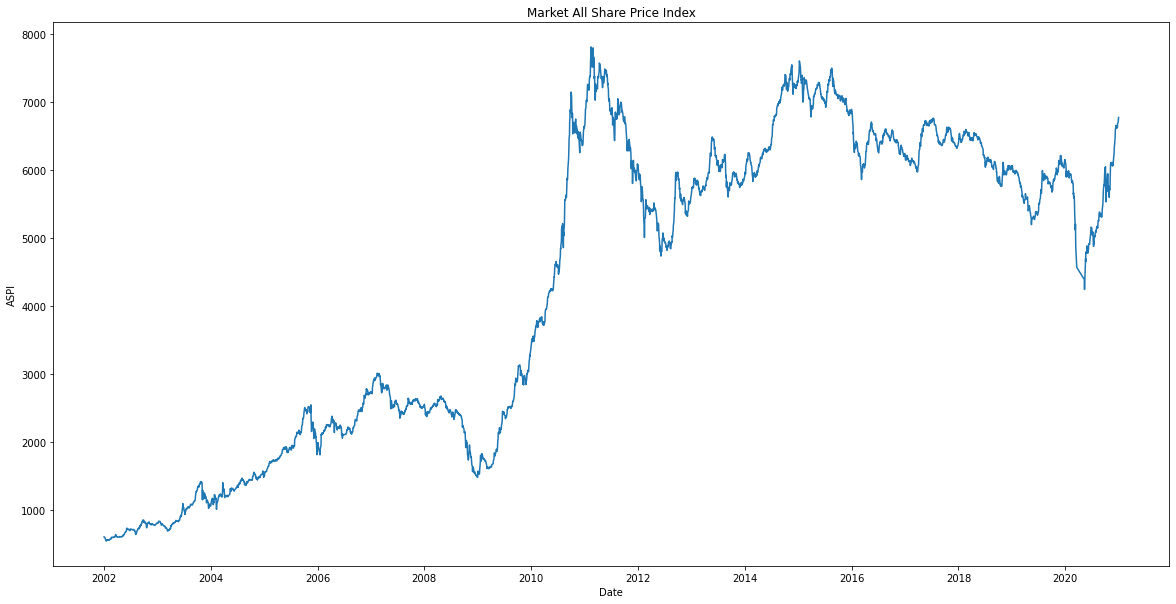

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_sentiments['Date'],df_sentiments['ASPI'])
plt.title('Market All Share Price Index')
plt.xlabel('Date')
plt.ylabel('ASPI')
plt.show()

In [ ]:
df_crop = df_sentiments[ 4270 : 4478]

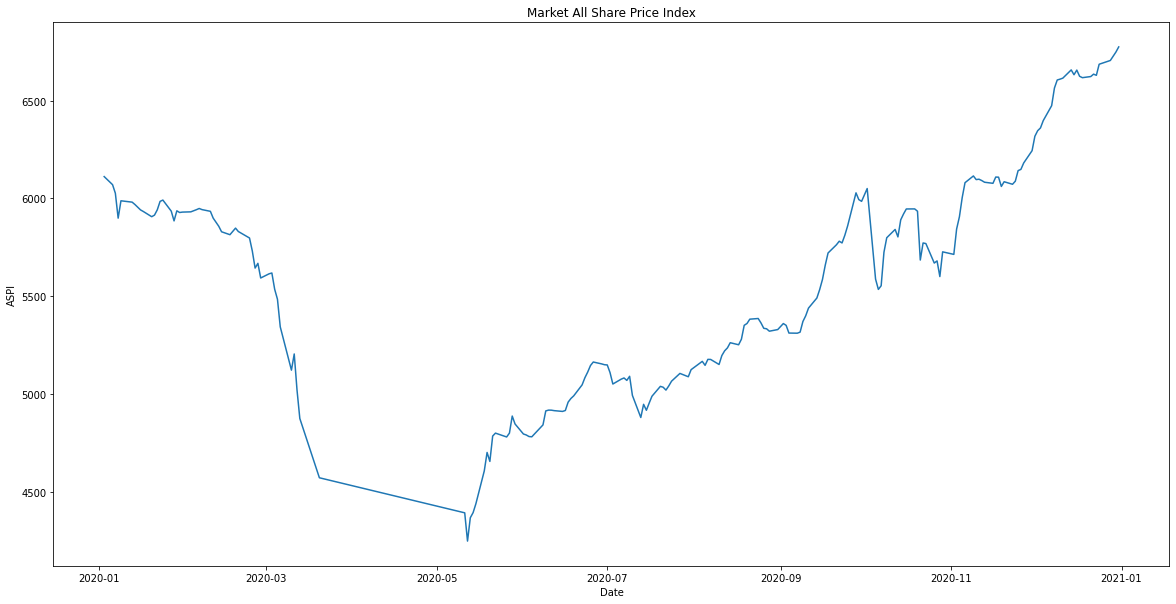

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_crop['Date'],df_crop['ASPI'])
plt.title('Market All Share Price Index')
plt.xlabel('Date')
plt.ylabel('ASPI')
plt.show()

In [ ]:
df_sentiments.index

RangeIndex(start=0, stop=4478, step=1)

In [ ]:
df_sector = df_sentiments[ 4270 : 4478]

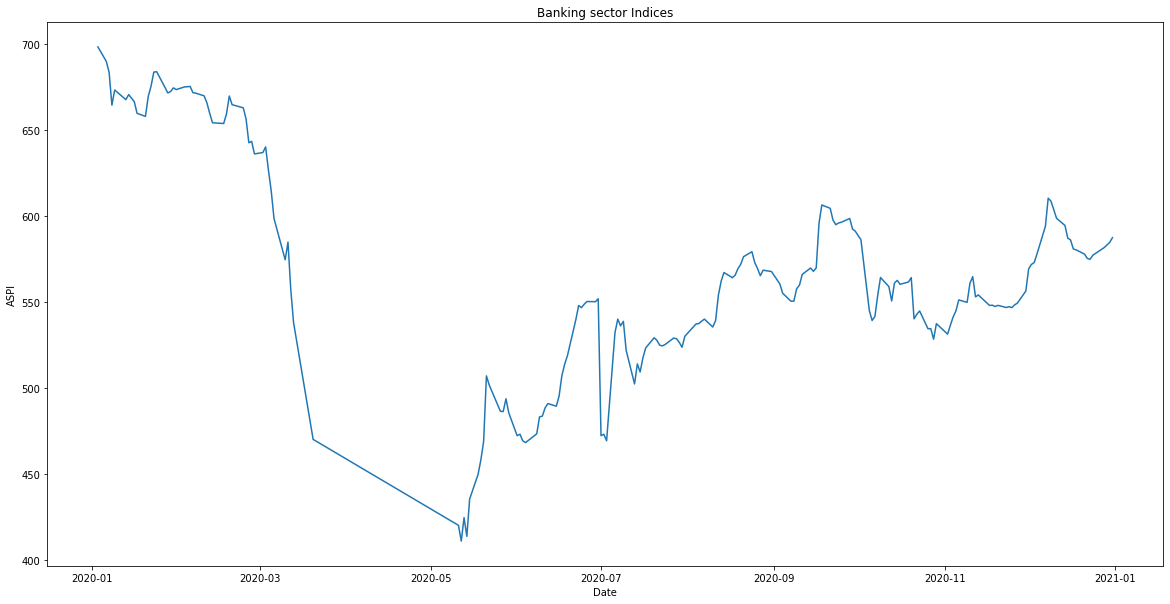

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_sector['Date'],df_sector['Sector_Index'])
plt.title('Banking sector Indices')
plt.xlabel('Date')
plt.ylabel('ASPI')
plt.show()

# Visualization

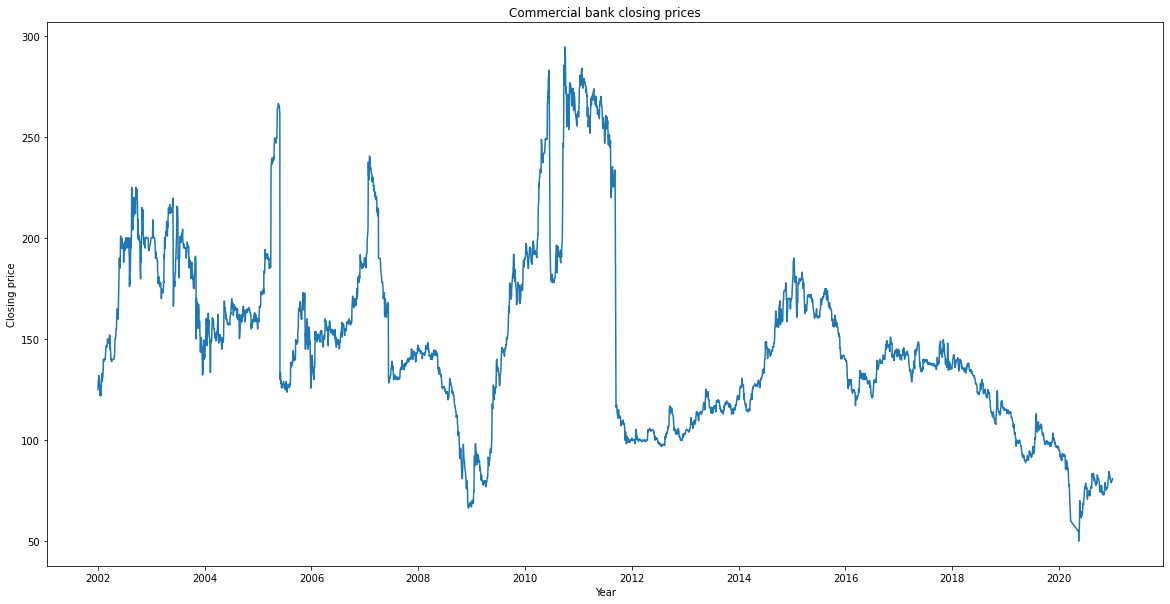

In [ ]:
#plot
plt.figure(figsize=(20,10))
plt.plot(df.index.values,df[' Close '])
plt.title('Commercial bank closing prices')
plt.xlabel('Year')
plt.ylabel('Closing price')
plt.show()

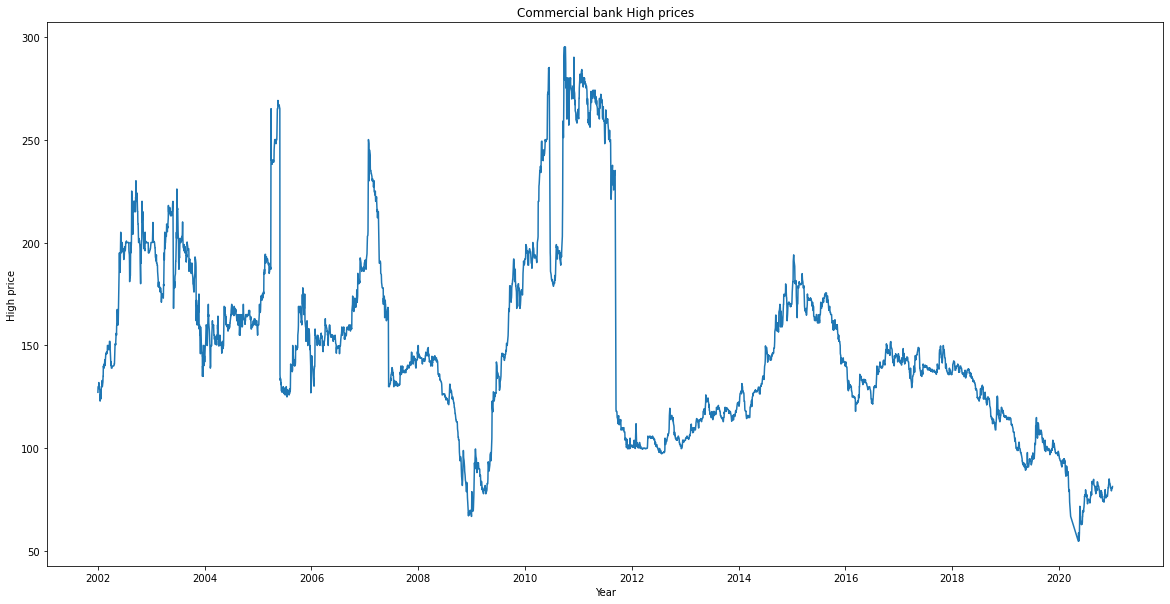

In [ ]:
#plot
plt.figure(figsize=(20,10))
plt.plot(df.index.values,df[' High '])
plt.title('Commercial bank High prices')
plt.xlabel('Year')
plt.ylabel('High price')
plt.show()

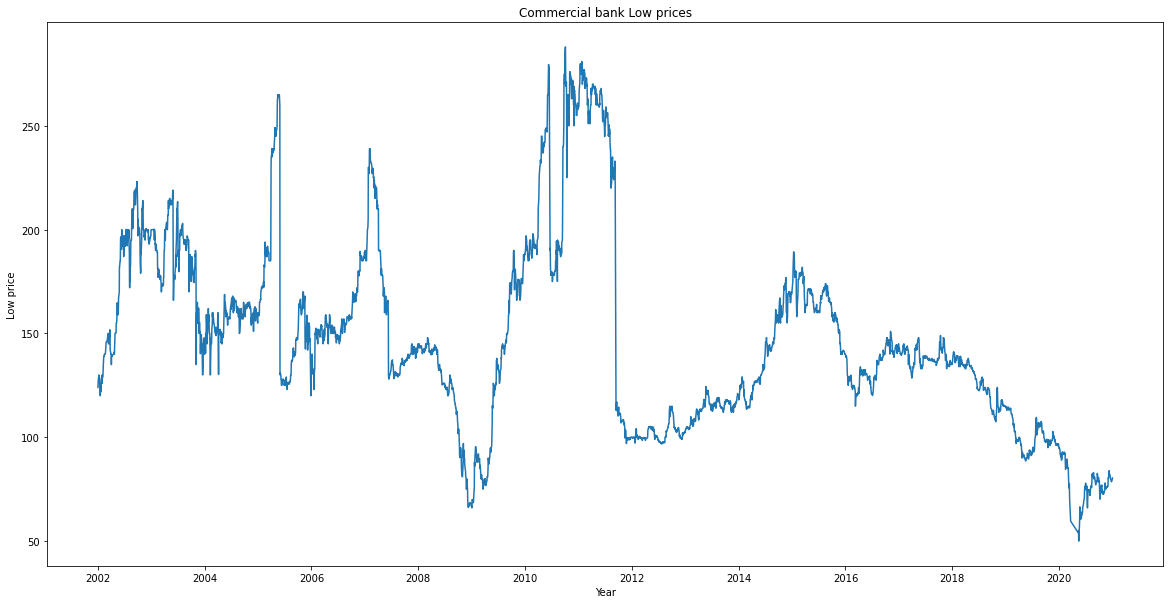

In [ ]:
#plot
plt.figure(figsize=(20,10))
plt.plot(df.index.values,df[' Low '])
plt.title('Commercial bank Low prices')
plt.xlabel('Year')
plt.ylabel('Low price')
plt.show()

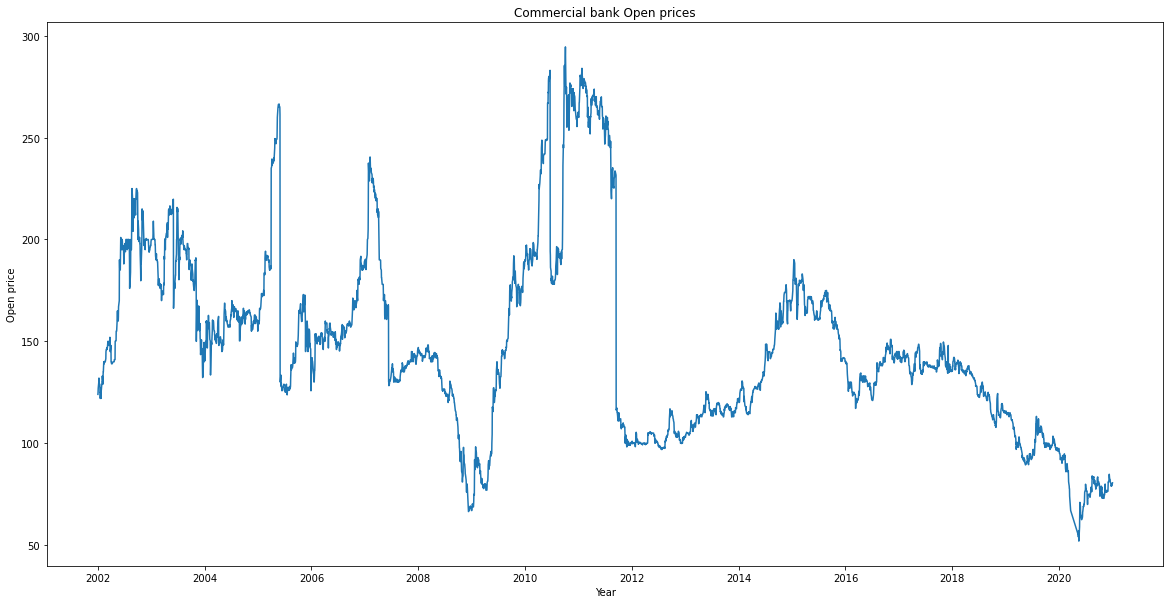

In [ ]:
#plot
plt.figure(figsize=(20,10))
plt.plot(df.index.values,df[' Open '])
plt.title('Commercial bank Open prices')
plt.xlabel('Year')
plt.ylabel('Open price')
plt.show()

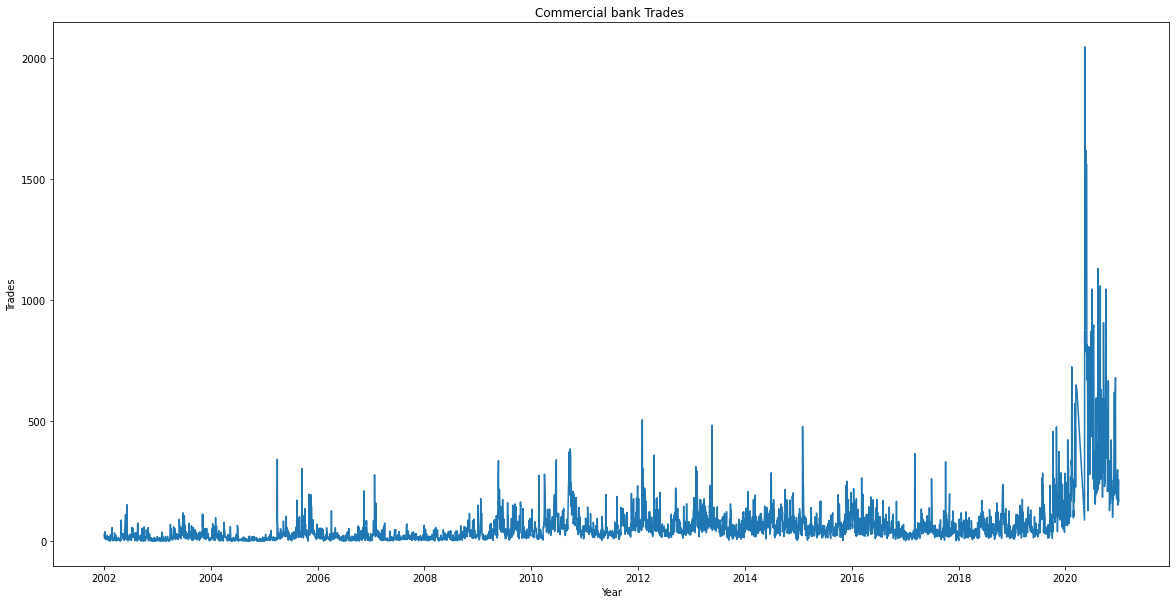

In [ ]:
#plot
plt.figure(figsize=(20,10))
plt.plot(df.index.values,df[' Trades '])
plt.title('Commercial bank Trades ')
plt.xlabel('Year')
plt.ylabel('Trades')
plt.show()

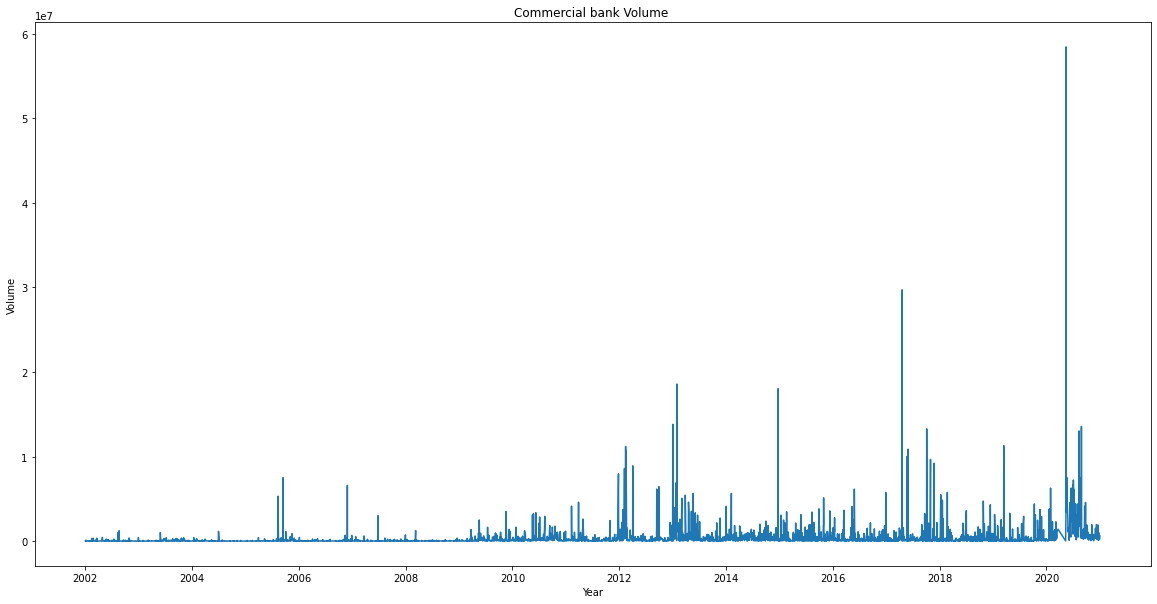

In [ ]:
#plot
plt.figure(figsize=(20,10))
plt.plot(df.index.values,df[' Volume '])
plt.title('Commercial bank Volume ')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

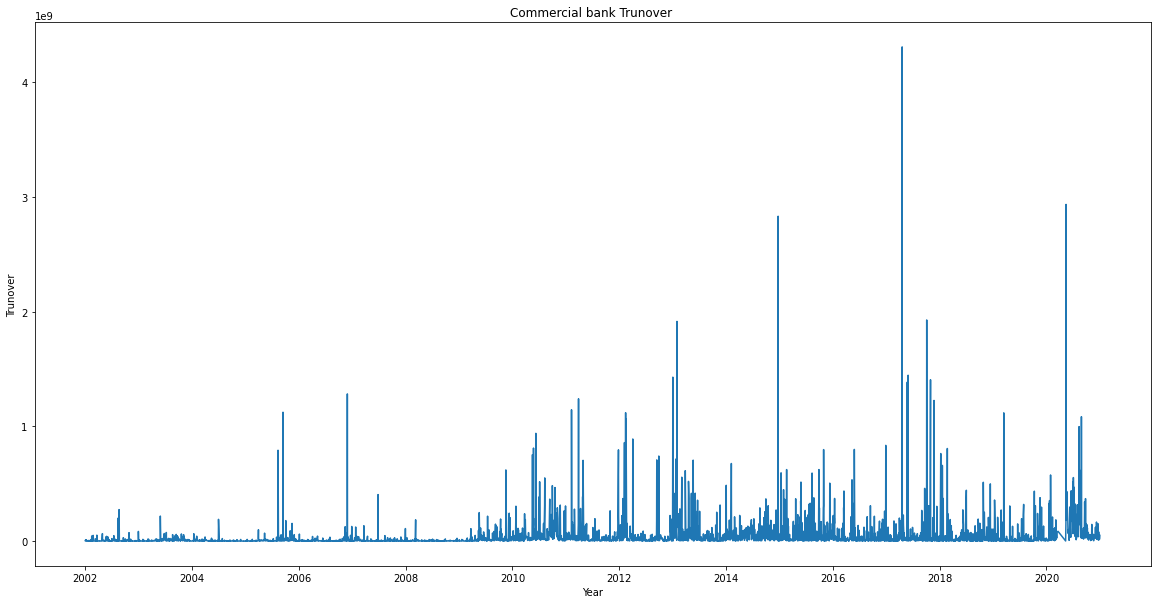

In [ ]:
#plot
plt.figure(figsize=(20,10))
plt.plot(df.index.values,df[' Trunover '])
plt.title('Commercial bank Trunover ')
plt.xlabel('Year')
plt.ylabel('Trunover')
plt.show()

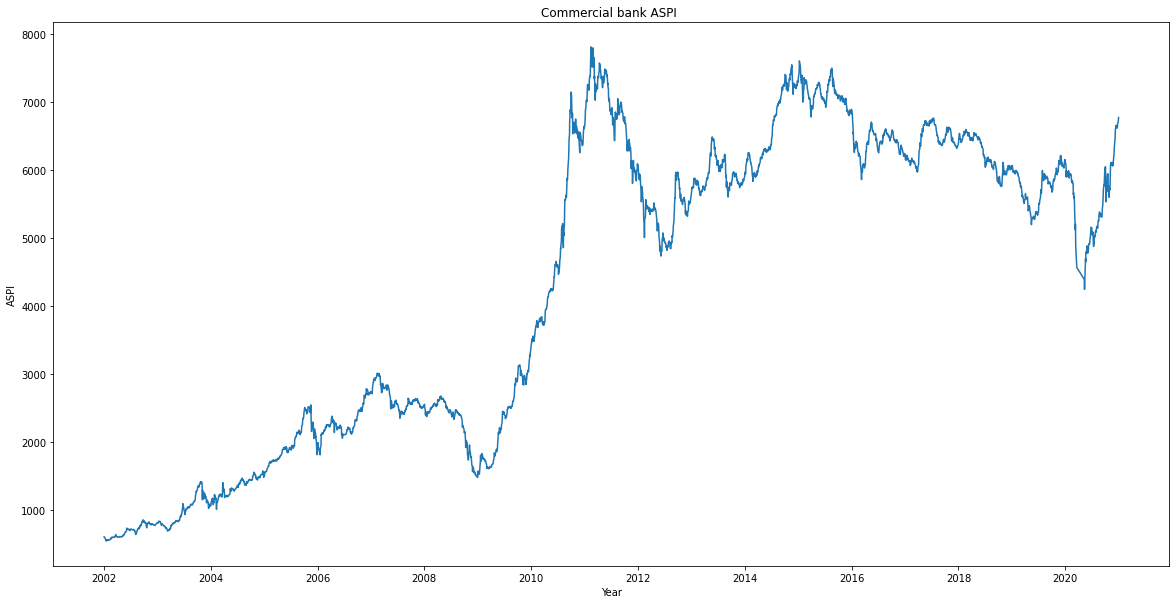

In [ ]:
#plot
plt.figure(figsize=(20,10))
plt.plot(df.index.values,df['ASPI'])
plt.title('Commercial bank ASPI ')
plt.xlabel('Year')
plt.ylabel('ASPI')
plt.show()

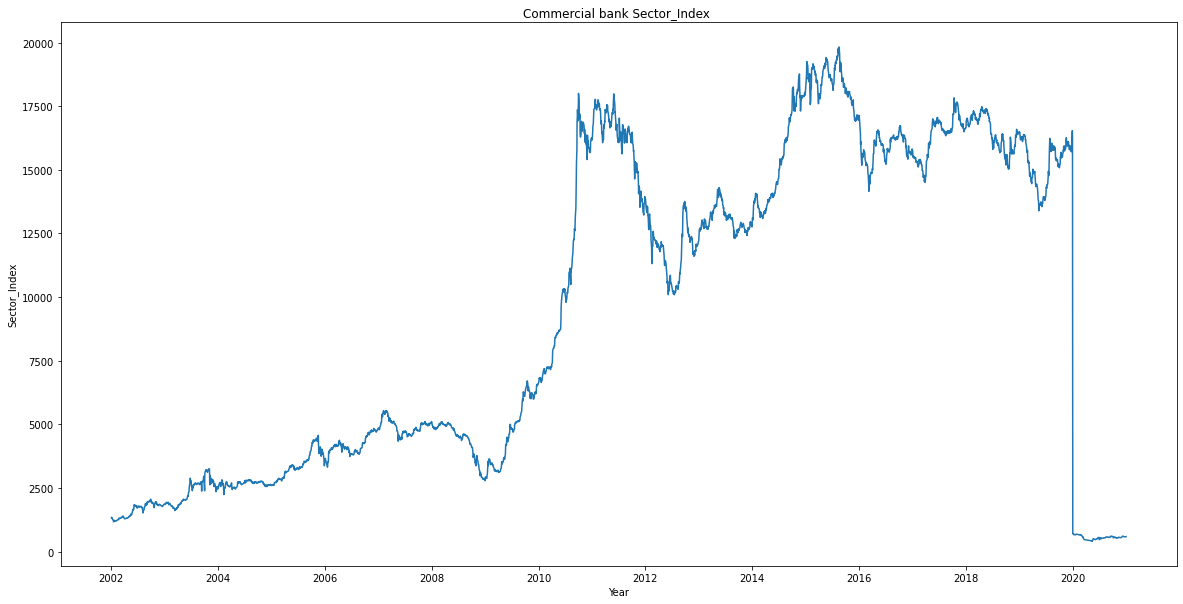

In [ ]:
#plot
plt.figure(figsize=(20,10))
plt.plot(df.index.values,df['Sector_Index'])
plt.title('Commercial bank Sector_Index ')
plt.xlabel('Year')
plt.ylabel('Sector_Index')
plt.show()

# Future dates value forcast

In [11]:
model = load_model('/content/drive/MyDrive/Sentiments/COMB/100epochs')

OSError: ignored

In [ ]:
n_future = 1500
forcast_period_dates = pd.date_range(list(train_dates)[-1],periods=n_future, freq= '1d').tolist()

In [ ]:
forcast_period_dates

In [ ]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x[-1:]

In [ ]:

forcast = model.predict(trainX[-n_future:])

In [ ]:
trainX[-n_future:]

In [ ]:
trainX[-n_future:]

In [ ]:
forcast.shape

In [ ]:
df_for_training.shape[1]

In [ ]:
forcast_copies = np.repeat(forcast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forcast_copies)[:,0]

In [ ]:
forcast_copies.shape

In [ ]:
y_pred_future

In [ ]:
forecast_dates = []
for time_i in forcast_period_dates:
  forecast_dates.append(time_i.date())

In [ ]:
forecast_dates

In [ ]:
df_forcast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forcast['Date'] = pd.to_datetime(df_forcast['Date'])
df_forcast['Close'] = df_forcast['Close'].apply(lambda x:round(x,2))

In [ ]:
df_forcast

In [ ]:
df_forcast.to_excel('predict.xlsx')

In [ ]:
!cp -r /content/predict.xlsx /content/drive/MyDrive/Combdata

In [ ]:
df

In [ ]:
df = pd.read_excel("/content/comcp.xlsx")

In [ ]:
Original = df[['Date', ' Close ']]
Original['Date'] = pd.to_datetime(Original['Date'])
Original = Original.loc[Original['Date'] >= '2019-09-1 ']

In [ ]:
Original

In [ ]:
df_forcast.index[0]

In [ ]:
df_forcast.at[df_forcast.index[0],'Close']

In [ ]:
Original.at[Original.index[-1],' Close '] = df_forcast.at[df_forcast.index[0],'Close']

In [ ]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20,10

In [ ]:

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
plt.plot(Original['Date'], Original[' Close '], color='red', label='Previous closing Original Price')
plt.plot(df_forcast['Date'],df_forcast['Close'], color='cyan', label='Predicted closing price')
plt.xlabel('Stock Price')
plt.ylabel('Date') 
plt.title('100 epochs and 16 batch size ')
plt.legend()

plt.show()

# Accuracy for 150 epoch 

In [ ]:

import tensorflow as tf
from keras.models import load_model

from tensorflow import keras


In [ ]:
!pip install keras --upgrade

In [ ]:
modelnew = load_model('/content/drive/MyDrive/Sentiments/COMB/100epochs')

In [ ]:
modelnew

In [ ]:

#y_value = modelnew.predict(testX)


In [ ]:

#y_value.shape

In [ ]:
#forcast_copies = np.repeat(y_value, df_for_training.shape[1], axis=-1)
#y_pred_future = scaler.inverse_transform(forcast_copies)[:,0]

In [ ]:

#forcast_copies.shape

In [ ]:
testY

array([[0.85240964],
       [0.84337349],
       [0.84337349],
       [0.84236948],
       [0.84337349],
       [0.85140562],
       [0.83935743],
       [0.83232932],
       [0.82329317],
       [0.80220884],
       [0.79216867],
       [0.79016064],
       [0.80220884],
       [0.8062249 ],
       [0.81726908],
       [0.84337349],
       [0.83634538],
       [0.84738956],
       [0.85341365],
       [0.85742972],
       [0.8935743 ],
       [0.86746988],
       [0.85542169],
       [0.89959839],
       [0.92369478],
       [0.94779116],
       [0.92871486],
       [0.9246988 ],
       [0.9246988 ],
       [0.95180723],
       [0.95281124],
       [0.9437751 ],
       [0.95281124],
       [0.95381526],
       [0.95783133],
       [0.97188755],
       [0.97590361],
       [0.98895582],
       [0.98895582],
       [0.98293173],
       [0.97791165],
       [0.97690763],
       [0.95481928],
       [0.88253012],
       [0.86746988],
       [0.8875502 ],
       [0.88052209],
       [0.864

In [ ]:

test_copies = np.repeat(testY, 9, axis=-1)

In [ ]:
test_copies.shape

(882, 9)

In [ ]:
testX.shape

(882, 14, 8)

In [ ]:
testX.shape

(882, 14, 8)

In [ ]:
predictions_y = modelnew.predict(testX)
forcast_copies = np.repeat(predictions_y, 9, axis=-1)

In [ ]:
forcast_copies.shape

(882, 9)

In [ ]:
test_copies.shape

(882, 9)

shoud

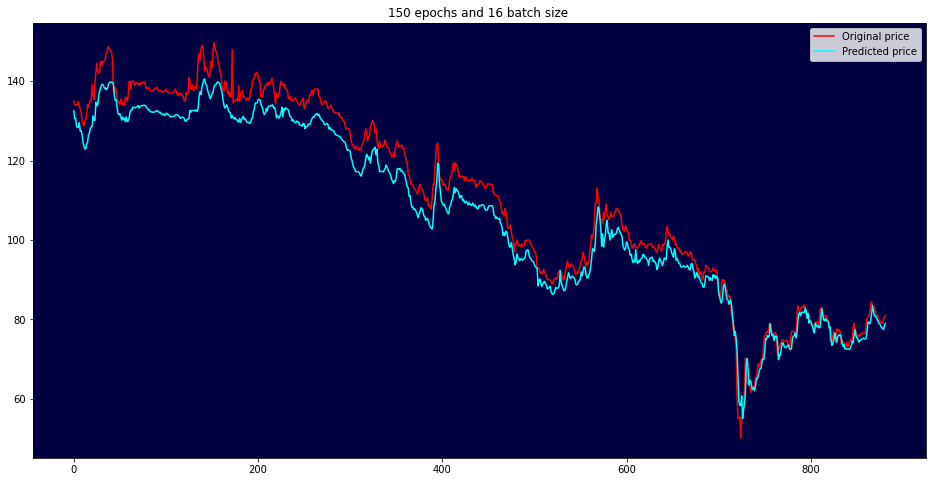

In [ ]:
predictions = scaler.inverse_transform(forcast_copies)[:,0]
y_test_scaled = scaler.inverse_transform(test_copies)[:,0]
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.title('150 epochs and 16 batch size ')
plt.legend()

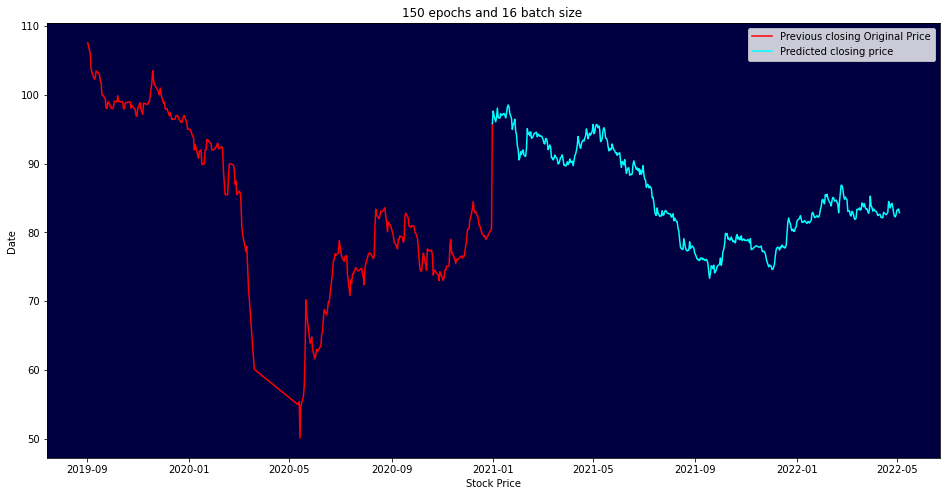

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
plt.plot(Original['Date'], Original[' Close '], color='red', label='Previous closing Original Price')
plt.plot(df_forcast['Date'],df_forcast['Close'], color='cyan', label='Predicted closing price')
plt.xlabel('Stock Price')
plt.ylabel('Date') 
plt.title('150 epochs and 16 batch size ')
plt.legend()

plt.show()

# Ignored Classification part 

In [ ]:
predictions_y.shape

(882, 1)

In [ ]:
import sklearn.metrics as metrics

In [ ]:
testY.ndim

2

In [ ]:
testY1 = np.squeeze(testY)

In [ ]:
testY1.shape

(882,)

In [ ]:
predictions_y1 = np.squeeze(predictions_y)

In [ ]:
predictions_y1.shape

(882,)

In [ ]:
test_values = np.array(y_test_scaled)

In [ ]:
test_list = test_values.tolist()

In [ ]:
pred_list = predictions.tolist()

In [ ]:
df_test = pd.DataFrame(test_list, columns=['testY'])

In [ ]:
df_test['predY'] = pred_list

In [ ]:
df_test1 = df_test.round(0).astype(int)

In [ ]:
df_test1

,testY,predY
0,78,77
1,78,77
2,78,77
3,78,77
4,78,77
5,78,77
6,78,77
7,78,77
8,78,77
9,78,77


In [ ]:
df_list_testy = df_test1['testY'].tolist()

In [ ]:
df_list_predY = df_test1['predY'].tolist()

In [ ]:
df_test=np.round(df_test, decimals=2)

In [ ]:
print(df_test1.dtypes)

testY    int64
predY    int64
dtype: object


In [ ]:

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(testY, predictions_y)
print('MSE :',mse)
print('RMSE:',math.sqrt(mse)) 
print('MAPE:',mean_absolute_percentage_error(test_list,pred_list))

MSE : 0.00816138272636649
RMSE: 0.09034037151997157
MAPE: 0.10328806506254623


In [ ]:
# Model evaluation

print(classification_report(df_list_testy, df_list_predY))
print(confusion_matrix(df_list_testy, df_list_predY))

MNB_f1 = round(f1_score(df_list_testy, df_list_predY, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(df_list_testy, df_list_predY)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

          77       0.70      1.00      0.82       588
          78       1.00      0.13      0.23       294

    accuracy                           0.71       882
   macro avg       0.85      0.56      0.53       882
weighted avg       0.80      0.71      0.62       882

[[588   0]
 [256  38]]
Accuracy :  70.98  %
f1_score :  0.624


# Custom Value

In [ ]:
Custom = [[79.50,78.9,79.5,297.0,1019197,80554269.1,6629.02,15574.73]]

In [ ]:
type(Custom)

list

In [ ]:
cus = np.array(Custom)

In [ ]:
cus.shape

(1, 8)

In [ ]:
custom_scaler1 = np.repeat(cus, testX.shape[1],axis=0)

In [ ]:
custom_scaler1.shape

(14, 8)

In [ ]:
custom_scaler1 = scaler.fit_transform(custom_scaler1)

In [ ]:
custom_scaler1 = np.repeat(custom_scaler1[np.newaxis,:,:],testX.shape[0], axis=0)

In [ ]:
custom_scaler1.shape

(882, 14, 8)

In [ ]:
#custom_scaler1_trans = scaler.fit_transform(custom_scaler1)

In [ ]:
Custom_prediction = model.predict(custom_scaler1)

In [ ]:
Custom_prediction.shape



(882, 1)

In [ ]:
df_for_training.shape

(4476, 9)

In [ ]:
forcast_copies_finalize = np.repeat(Custom_prediction, 8, axis=-1)

In [ ]:
forcast_copies_finalize.shape

(882, 8)

In [ ]:
cus_predictions = scaler.inverse_transform(forcast_copies_finalize)

In [ ]:
cus_predictions

array([[7.9525581e+01, 7.8925583e+01, 7.9525581e+01, ..., 8.0554272e+07,
        6.6290454e+03, 1.5574756e+04],
       [7.9525581e+01, 7.8925583e+01, 7.9525581e+01, ..., 8.0554272e+07,
        6.6290454e+03, 1.5574756e+04],
       [7.9525581e+01, 7.8925583e+01, 7.9525581e+01, ..., 8.0554272e+07,
        6.6290454e+03, 1.5574756e+04],
       ...,
       [7.9525581e+01, 7.8925583e+01, 7.9525581e+01, ..., 8.0554272e+07,
        6.6290454e+03, 1.5574756e+04],
       [7.9525581e+01, 7.8925583e+01, 7.9525581e+01, ..., 8.0554272e+07,
        6.6290454e+03, 1.5574756e+04],
       [7.9525581e+01, 7.8925583e+01, 7.9525581e+01, ..., 8.0554272e+07,
        6.6290454e+03, 1.5574756e+04]], dtype=float32)

In [ ]:
predictions_333 = scaler.inverse_transform(cus_predictions)[:,0]

In [ ]:
predictions_333

array([159.02557, 159.02557, 159.02557, 159.02557, 159.02557, 159.02557,
       159.02557, 159.02557, 159.02557, 159.02557, 159.02557, 159.02557,
       159.02557, 159.02557, 159.02557, 159.02557, 159.02557, 159.02557,
       159.02557, 159.02557, 159.02557, 159.02557, 159.02557, 159.02557,
       159.02557, 159.02557, 159.02557, 159.02557, 159.02557, 159.02557,
       159.02557, 159.02557, 159.02557, 159.02557, 159.02557, 159.02557,
       159.02557, 159.02557, 159.02557, 159.02557, 159.02557, 159.02557,
       159.02557, 159.02557, 159.02557, 159.02557, 159.02557, 159.02557,
       159.02557, 159.02557, 159.02557, 159.02557, 159.02557, 159.02557,
       159.02557, 159.02557, 159.02557, 159.02557, 159.02557, 159.02557,
       159.02557, 159.02557, 159.02557, 159.02557, 159.02557, 159.02557,
       159.02557, 159.02557, 159.02557, 159.02557, 159.02557, 159.02557,
       159.02557, 159.02557, 159.02557, 159.02557, 159.02557, 159.02557,
       159.02557, 159.02557, 159.02557, 159.02557, 

In [ ]:
print('Custom prediction value is :',predictions_333[0])

Custom prediction value is : 159.02557


# LIST PREDICTION

In [ ]:
Custom = [81.5,	80.4,		80.6,	253.0,	616275,	49856432.7,	774.22	,587.30]

In [ ]:
custom_df = pd.DataFrame(Custom).T

In [ ]:
custom_df.columns = ['High', 'Low', 'Open', 'Trades', 'Volume', 'Trunover','ASPI','Sector_Index']

In [ ]:
custom_df

,High,Low,Open,Trades,Volume,Trunover,ASPI,Sector_Index
0,81.5,80.4,80.6,253.0,616275.0,49856432.7,774.22,587.3


In [ ]:
cols =  list(custom_df)

In [ ]:
custom_df =custom_df[cols].astype(float)

In [ ]:
custom_df_array = np.array(custom_df)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_custom_scaled = scaler.fit_transform(custom_df_array)

In [ ]:
type(df_custom_scaled)

numpy.ndarray

In [ ]:
testX.shape

(882, 14, 8)

In [ ]:
df_custom_scaled .shape

(1, 8)

In [ ]:
custom_scaler_list = np.repeat(df_custom_scaled, 14,axis=0)

In [ ]:
custom_scaler_list.shape

(14, 8)

In [ ]:
custom_scaler_list[np.newaxis,:,:].shape

(1, 14, 8)

In [ ]:
custom_scaler_list = np.repeat(custom_scaler_list[np.newaxis,:,:],882, axis=0)

In [ ]:
custom_scaler_list.shape


(882, 14, 8)

In [ ]:
custom_scaler_list = np.array(custom_scaler_list)

In [ ]:
modelnew_150 = load_model('/content/drive/MyDrive/Sentiments/COMB/100epochs')

In [ ]:
list_Custom_prediction = modelnew.predict(custom_scaler_list)

In [ ]:
list_Custom_prediction.shape

(882, 1)

In [ ]:
list_forcast_copies_finalize = np.repeat(list_Custom_prediction, 8, axis=-1)

In [ ]:
list_forcast_copies_finalize.shape

(882, 8)

In [ ]:
list_predictions_333 = scaler.inverse_transform(list_forcast_copies_finalize)[:,0]

In [ ]:
list_predictions_333[0]

81.52558